# Fraud Detection Analysis | Machine Learning Prediction

##### Objective
The goal of this notebook is to build machine learning models to classify fraudulent credit card transactions.

##### Approach
1. Data Splitting & Resampling: The dataset is highly imbalanced, so resampling techniques are applied to improve fraud detection.
2. Models Used:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)
3. Evaluation Metrics:
Since accuracy is not a reliable metric for imbalanced data, the models are evaluated using:

- Precision: Measures how many predicted fraud cases are actually fraud.
- Recall: Measures how many actual fraud cases were correctly identified.
- F1 Score: Balances precision and recall.
- Confusion Matrix: Provides insight into model performance by showing true positives, false positives, true negatives, and false negatives.
##### Conclusion
This notebook provides a comparative analysis of multiple machine learning models for fraud detection, focusing on precision, recall, and F1 score to assess model effectiveness.

Loading transformed data from the Data Wrangling notebook

In [1]:
import pickle

with open("DATA/data.pkl", "rb") as f:
    X, y = pickle.load(f)

print(X.shape, y.shape)  # Verify the loaded data


(283726, 30) (283726,)


## Splitting of data into train and test

Splitting the dataset ensures the model generalizes well to unseen data and prevents overfitting. Key reasons:

1. Avoid Overfitting – Training on the entire dataset may cause the model to memorize patterns instead of learning general rules.
2. Evaluate Performance – The test set helps assess accuracy, precision, recall, and other metrics on unseen data.
3. Simulate Real-World Use – In fraud detection, models must predict new fraudulent transactions, not just past ones.
4. Enable Hyperparameter Tuning – A separate validation set helps fine-tune the model before final evaluation.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#### Oversampling (Increase Minority Class Instances)

Uses synthetic or duplicated fraud cases to balance the dataset.

Example: SMOTE (Synthetic Minority Over-sampling Technique)

In [9]:

from imblearn.over_sampling import SMOTE

num_datapoints_before = X_train.shape[0]

smote = SMOTE(sampling_strategy=0.8, random_state=42) # sampling_strategy is the parameter that control the amount of balance wanted in the resampled dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

num_datapoints_after = X_train_resampled.shape[0]


print(f"Number of datapoints before oversampling: {num_datapoints_before}")
print(f"Number of datapoints after oversampling: {num_datapoints_after}")

class_counts = y_train_resampled.value_counts()
print(class_counts) # the dataset is very imbalance, a rebalancment is needed to not bias the models

class_percentage = class_counts / class_counts.sum() * 100
print(f"Class distribution:\n{class_percentage}")

Number of datapoints before oversampling: 198608
Number of datapoints after oversampling: 356898
Class
0    198277
1    158621
Name: count, dtype: int64
Class distribution:
Class
0    55.555649
1    44.444351
Name: count, dtype: float64


The SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to handle imbalanced datasets in machine learning, 
where the classes are unevenly distributed. In cases where there is a minority class (credit fraud in this case), 
SMOTE helps balance the dataset by generating synthetic examples for the minority class instead of just oversampling the existing minority class instances.
It's a good approach but undersampling will be used mainly for lack of computational power that would result in long time processing.

#### Undersampling (Reduce Majority Class Instances)

Randomly removes some legitimate transactions to balance the dataset.

Example: Random Undersampling


In [13]:
from imblearn.under_sampling import RandomUnderSampler

num_datapoints_before = X_train.shape[0]

undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

num_datapoints_after = X_train_resampled.shape[0]


print(f"Number of datapoints before undersampling: {num_datapoints_before}")
print(f"Number of datapoints after undersampling: {num_datapoints_after}")

class_counts = y_train_resampled.value_counts()
print(class_counts) # the dataset is very imbalance, a rebalancment is needed to not bias the models

class_percentage = class_counts / class_counts.sum() * 100
print(f"Class distribution:\n{class_percentage}")

Number of datapoints before undersampling: 198608
Number of datapoints after undersampling: 993
Class
0    662
1    331
Name: count, dtype: int64
Class distribution:
Class
0    66.666667
1    33.333333
Name: count, dtype: float64


This is a technique that reduces the number of instances in the majority class to balance the dataset. It randomly selects a subset of samples from the majority class to match the specified proportion or target size.

#### Metrics for Evalution

- Precision: Measures how many predicted fraud cases are actually fraud.
- Recall: Measures how many actual fraud cases were correctly identified.
- F1 Score: Balances precision and recall.
- Confusion Matrix: Provides insight into model performance by showing true positives, false positives, true negatives, and false negatives.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred):
    # Compute metrics
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print metrics
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1

## Machine Learning Models

### Logistic Regression

A logistic regression model is applied to the data with an l2 penalty to avoid overfitting. The hyperparameter are chosen through a grid search (with cross-validation) to get the best model based on accuracy

In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters)
logreg_cv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9556767676767677


Evaluate the model on the test set

In [19]:
yhat=logreg_cv.predict(X_test)

Confusion Matrix:
[[83673  1303]
 [   17   125]]
Accuracy: 0.9845
Precision: 0.0875
Recall: 0.8803
F1 Score: 0.1592


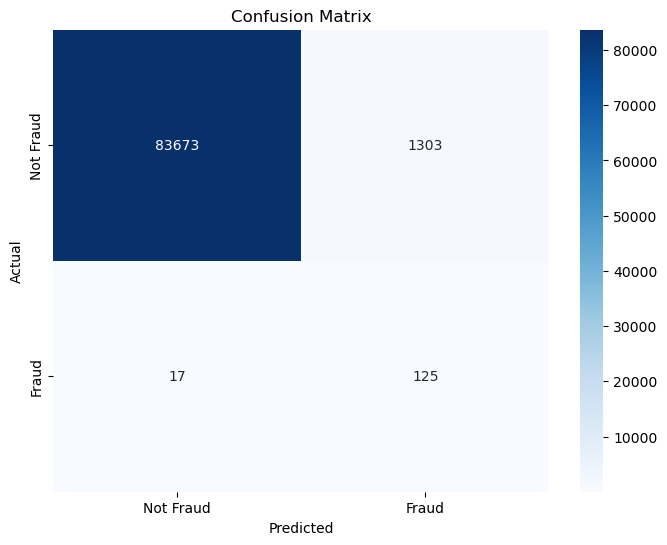

In [20]:
accuracy_lg, precision_lg, recall_lg, f1_lg = evaluate_model(y_test, yhat)

## Decision Tree
A decision tree is applied. The best parameters searched through grid search (with cross validation)

In [21]:
# Define the parameter grid for Decision Tree
parameters_dt = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Perform Grid Search with cross-validation
dt_cv = GridSearchCV(estimator=dt, cv=10, param_grid=parameters_dt)
dt_cv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [23]:
# Print the best parameters and best score
print("Tuned hyperparameters :(best parameters) ", dt_cv.best_params_)
print("Accuracy :", dt_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'max_depth': 5, 'min_samples_split': 10}
Accuracy : 0.9254545454545454


In [24]:
# Predict on the test set
yhat_dt = dt_cv.predict(X_test)

Confusion Matrix:
[[82701  2275]
 [   24   118]]
Accuracy: 0.9730
Precision: 0.0493
Recall: 0.8310
F1 Score: 0.0931


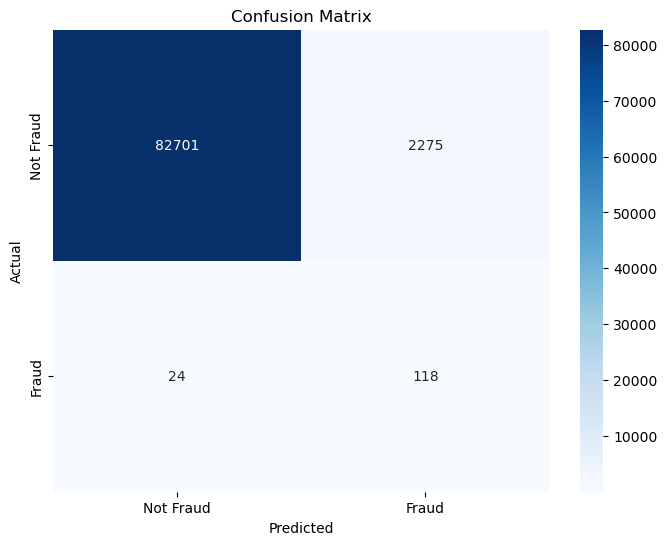

In [25]:
# Evaluate the model
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(y_test, yhat_dt)

## Random Forset

Tuned hyperparameters :(best parameters)  {'max_depth': 15, 'n_estimators': 200}
Accuracy : 0.9556868686868686
Confusion Matrix:
[[83939  1037]
 [   20   122]]
Accuracy: 0.9876
Precision: 0.1053
Recall: 0.8592
F1 Score: 0.1875


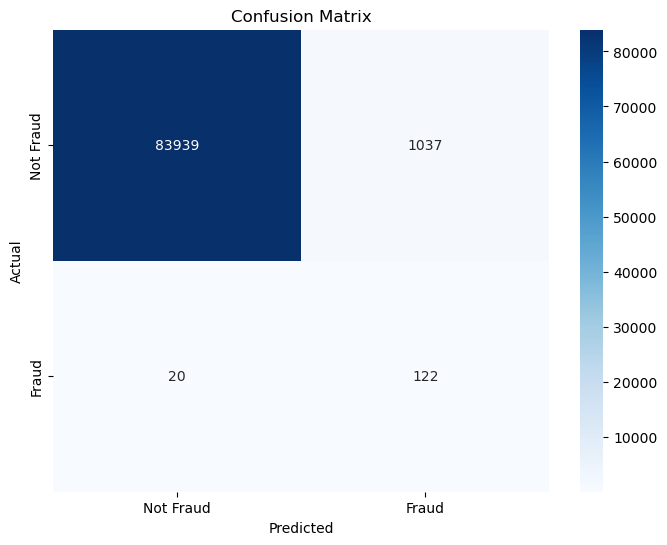

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
parameters_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Perform Grid Search with cross-validation
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters_rf)
rf_cv.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Tuned hyperparameters :(best parameters) ", rf_cv.best_params_)
print("Accuracy :", rf_cv.best_score_)

# Predict on the test set
yhat_rf = rf_cv.predict(X_test)

# Evaluate the model
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, yhat_rf)

## AdaBoost

/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

Tuned hyperparameters :(best parameters)  {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy : 0.9546666666666667
Confusion Matrix:
[[83894  1082]
 [   19   123]]
Accuracy: 0.9871
Precision: 0.1021
Recall: 0.8662
F1 Score: 0.1826


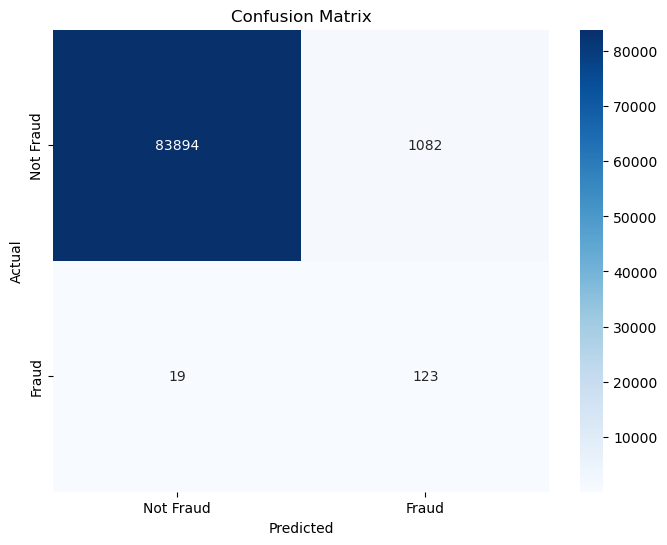

In [27]:
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost
parameters_ab = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}

# Initialize the AdaBoost model
ab = AdaBoostClassifier()

# Perform Grid Search with cross-validation
ab_cv = GridSearchCV(estimator=ab, cv=10, param_grid=parameters_ab)
ab_cv.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Tuned hyperparameters :(best parameters) ", ab_cv.best_params_)
print("Accuracy :", ab_cv.best_score_)

# Predict on the test set
yhat_ab = ab_cv.predict(X_test)

# Evaluate the model
accuracy_ab, precision_ab, recall_ab, f1_ab = evaluate_model(y_test, yhat_ab)

## Support Vector Machine

Tuned hyperparameters :(best parameters)  {'C': 10, 'kernel': 'linear'}
Accuracy : 0.9587171717171717
Confusion Matrix:
[[83737  1239]
 [   18   124]]
Accuracy: 0.9852
Precision: 0.0910
Recall: 0.8732
F1 Score: 0.1648


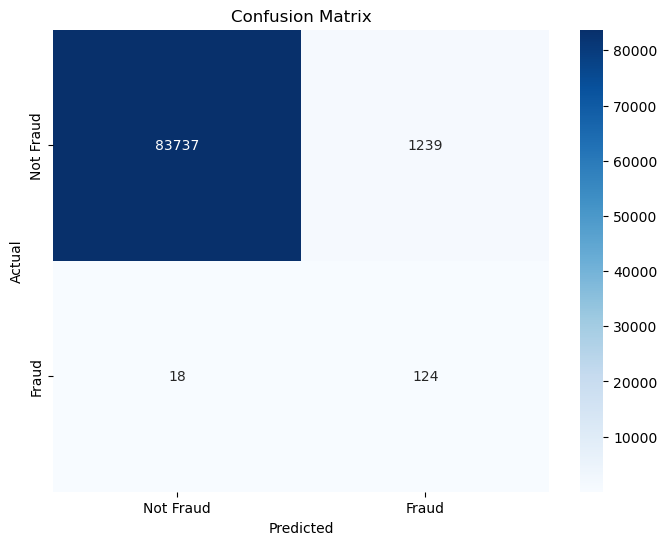

In [29]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
parameters_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize the SVM model
svm = SVC()

# Perform Grid Search with cross-validation
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters_svm)
svm_cv.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)

# Predict on the test set
yhat_svm = svm_cv.predict(X_test)

# Evaluate the model
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, yhat_svm)

## Feed Foward Neural Network
Use a simple FFNN for classification. It's just an experiment because with tabular data NN should be outperformed by the more classical machine learning approaches

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the FFNN model
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(X_train_resampled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = FFNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1/20, Loss: 0.3782
Epoch 2/20, Loss: 0.0052
Epoch 3/20, Loss: 1.4569
Epoch 4/20, Loss: 0.0066
Epoch 5/20, Loss: 0.0264
Epoch 6/20, Loss: 0.0091
Epoch 7/20, Loss: 0.1795
Epoch 8/20, Loss: 0.0072
Epoch 9/20, Loss: 0.0121
Epoch 10/20, Loss: 0.0362
Epoch 11/20, Loss: 0.0073
Epoch 12/20, Loss: 0.0014
Epoch 13/20, Loss: 0.0007
Epoch 14/20, Loss: 0.0305
Epoch 15/20, Loss: 0.0004
Epoch 16/20, Loss: 0.1137
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.2361
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0009
Confusion Matrix:
[[83093  1883]
 [   16   126]]
Accuracy: 0.9777
Precision: 0.0627
Recall: 0.8873
F1 Score: 0.1172


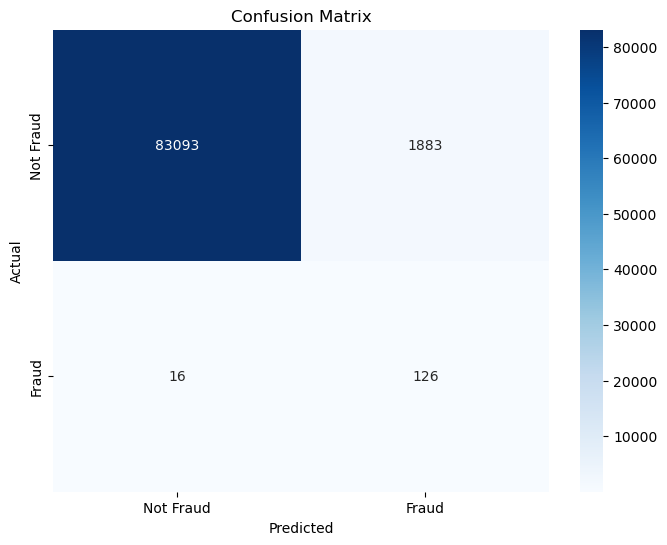

In [40]:
# Train the model
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    permutation = torch.randperm(X_train_tensor.size()[0])
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    yhat_ffnn = model(X_test_tensor)
    yhat_ffnn = (yhat_ffnn > 0.5).float().numpy()

# Evaluate the model
accuracy_ffnn, precision_ffnn, recall_ffnn, f1_ffnn = evaluate_model(y_test, yhat_ffnn)


## Model Comparison
The comparison is based on the recall and F1 scores of different models. Recall measures how many actual fraud cases were correctly identified, while F1 score balances precision and recall. The models compared include Logistic Regression, Decision Tree, Random Forest, AdaBoost, SVM, and Neural Network.

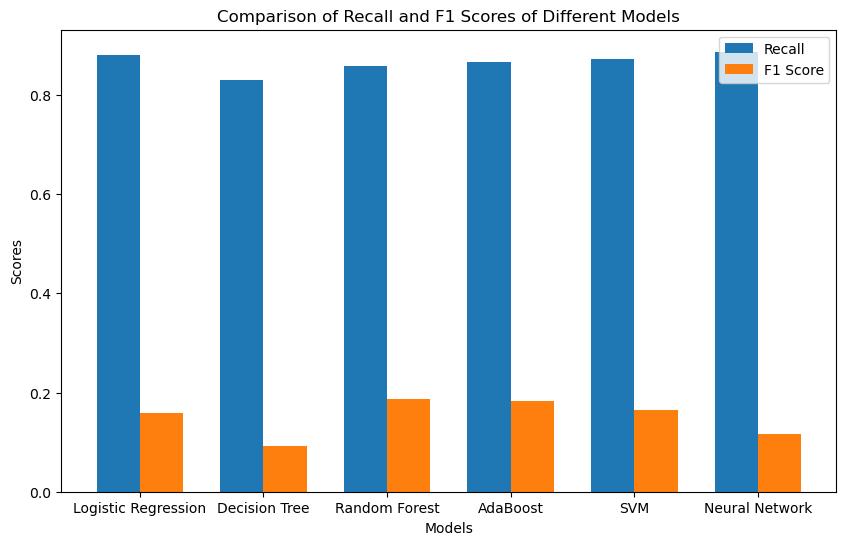

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVM', 'Neural Network']

# Recall scores
recall_scores = [recall_lg, recall_dt, recall_rf, recall_ab, recall_svm, recall_ffnn]

# F1 scores
f1_scores = [f1_lg, f1_dt, f1_rf, f1_ab, f1_svm, f1_ffnn]

# Bar width
bar_width = 0.35

# X positions for the bars
index = np.arange(len(models))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot recall scores
bar1 = ax.bar(index, recall_scores, bar_width, label='Recall')

# Plot F1 scores
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Recall and F1 Scores of Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()


### Conclusion of the Model Comparison

The comparison of different machine learning models for fraud detection reveals the following insights:

1. **Recall**: The Feed Forward Neural Network (FFNN) achieved the highest recall score of 0.8873, indicating its effectiveness in identifying actual fraud cases. The Support Vector Machine (SVM) and Logistic Regression also performed well with recall scores of 0.8732 and 0.8803, respectively.

2. **F1 Score**: The Random Forest model achieved the highest F1 score of 0.1875, balancing both precision and recall. AdaBoost and Logistic Regression followed closely with F1 scores of 0.1826 and 0.1592, respectively.

3. **Precision**: Despite having lower recall, the Random Forest model achieved the highest precision score of 0.1053, indicating its ability to correctly identify fraud cases among the predicted frauds.

4. **Overall Performance**: While the FFNN showed the highest recall, the Random Forest model provided a better balance between precision and recall, as indicated by its highest F1 score. Logistic Regression and AdaBoost also demonstrated competitive performance.

In conclusion, the Random Forest model stands out as the most balanced and effective model for fraud detection in this analysis, followed by AdaBoost and Logistic Regression. The choice of model may depend on the specific requirements of the application, such as the need for higher recall or precision.
